**Polinomio de Taylor Aproximacion Lineal**

$f({\bf x}) = 100(x_2 - x_1^2)^2+(x_1-1)^2$

In [ ]:
import sympy as sp

In [ ]:
x = [f'x{i}' for i in range(1,3)];

In [ ]:
x

['x1', 'x2']

In [ ]:
x = sp.Matrix(x);

In [ ]:
x

Matrix([
[x1],
[x2]])

In [ ]:
x.shape

(2, 1)

In [ ]:
x.T

Matrix([[x1, x2]])

In [ ]:
f = 100*(x[1]-x[0]**2)**2 +(x[0]-1)**2

In [ ]:
f

(x1 - 1)**2 + 100*(-x1**2 + x2)**2

Otra forma

In [ ]:
f = sp.parse_expr('100*(x2-x1**2)**2 +(x1-1)**2')

In [ ]:
f

(x1 - 1)**2 + 100*(-x1**2 + x2)**2

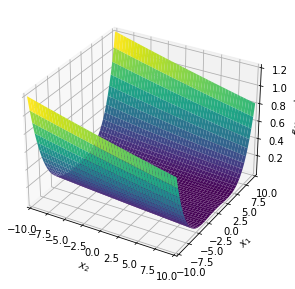

In [ ]:
sp.plotting.plot3d(f)

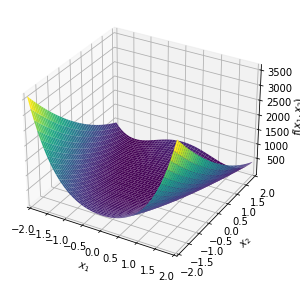

In [ ]:
sp.plotting.plot3d((f,(x[0],-2,2),(x[1],-2,2)))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x1 = np.arange(-2,2.1,0.1);
x2 = np.arange(-2,2.1,0.1);

In [ ]:
x1

array([-2.00000000e+00, -1.90000000e+00, -1.80000000e+00, -1.70000000e+00,
       -1.60000000e+00, -1.50000000e+00, -1.40000000e+00, -1.30000000e+00,
       -1.20000000e+00, -1.10000000e+00, -1.00000000e+00, -9.00000000e-01,
       -8.00000000e-01, -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
       -4.00000000e-01, -3.00000000e-01, -2.00000000e-01, -1.00000000e-01,
        1.77635684e-15,  1.00000000e-01,  2.00000000e-01,  3.00000000e-01,
        4.00000000e-01,  5.00000000e-01,  6.00000000e-01,  7.00000000e-01,
        8.00000000e-01,  9.00000000e-01,  1.00000000e+00,  1.10000000e+00,
        1.20000000e+00,  1.30000000e+00,  1.40000000e+00,  1.50000000e+00,
        1.60000000e+00,  1.70000000e+00,  1.80000000e+00,  1.90000000e+00,
        2.00000000e+00])

In [ ]:
Z = []
for xi in x2: # nos movemos en y
  row = [] 
  for xj in x1: # nos movemos en x
    to_rep = {x[0]:xj,x[1]:xi}
    z = f.subs(to_rep).evalf()
    row.append(z)
    #print(f'to_rep={to_rep} y f={z}')
  Z.append(row)

In [ ]:
np.matrix(Z)

matrix([[3609.00000000000, 3155.62000000000, 2753.60000000000, ...,
         2746.40000000001, 3148.02000000001, 3601.00000000002],
        [3490.00000000000, 3044.42000000000, 2649.80000000000, ...,
         2642.60000000001, 3036.82000000001, 3482.00000000002],
        [3373.00000000000, 2935.22000000000, 2548.00000000000, ...,
         2540.80000000001, 2927.62000000001, 3365.00000000002],
        ...,
        [492.999999999998, 336.019999999999, 215.199999999999, ...,
         208.000000000003, 328.420000000004, 485.000000000005],
        [449.999999999999, 300.819999999999, 187.399999999999, ...,
         180.200000000002, 293.220000000003, 442.000000000004],
        [408.999999999999, 267.619999999999, 161.599999999999, ...,
         154.400000000002, 260.020000000003, 401.000000000004]],
       dtype=object)

In [ ]:
Z = np.array(Z,dtype=np.float32)

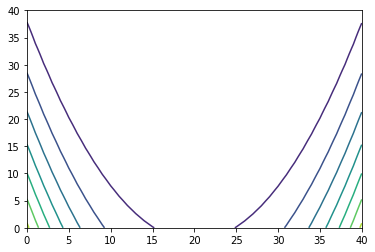

In [ ]:
plt.contour(Z)

<a list of 40 text.Text objects>

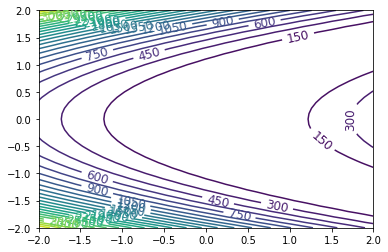

In [ ]:
#vamos a crear una malla
x2,x1 = np.meshgrid(x1,x2)
contorno = plt.contour(x1,x2,Z,levels=30)
plt.clabel(contorno,inline=True,fontsize=12)

$L({\bf x}) = f_0 + \delta{\bf x}_0^T \cdot \nabla f_0$, en donde $\delta{\bf x}_0 = {\bf x} - {\bf x}_0 \in \Re^{n\times 1}$

In [ ]:
# punto de expansión
x0= np.array([1.5,1.5], dtype=np.float32).reshape(-1,1)

In [ ]:
to_rep = {'x1':x0[0,0],'x2':x0[1,0]}

In [ ]:
f0 = f.subs(to_rep)

In [ ]:
dx0 = x-x0

In [ ]:
#sp.diff(f,x[1])

**Jacobiano**

In [ ]:
gf = sp.Matrix([f]).jacobian(x)

In [ ]:
gf0 = gf.subs(to_rep)

In [ ]:
gf0

Matrix([[451.0, -150.0]])

In [ ]:
L = f0 + dx0.dot(gf0)

In [ ]:
L

451.0*x1 - 150.0*x2 - 395.0

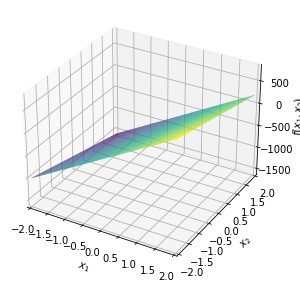

In [ ]:
sp.plotting.plot3d(L,(x[0],-2,2),(x[1],-2,2))

**Aproximación Cuadrática**

$Q({\bf x})=L({\bf x}) + \frac{1}{2} \delta {\bf x}_0^T \, \nabla^2 f_0 \, \delta{\bf x}_0$

In [ ]:
L

451.0*x1 - 150.0*x2 - 395.0

In [ ]:
Hf = gf.jacobian(x)

In [ ]:
Hf

Matrix([
[1200*x1**2 - 400*x2 + 2, -400*x1],
[                -400*x1,     200]])

In [ ]:
Hf0 = Hf.subs(to_rep)

In [ ]:
Hf0

Matrix([
[2102.0, -600.0],
[-600.0,    200]])

In [ ]:
Q = L + 0.5*dx0.dot(Hf0.dot(dx0))

<ipython-input-73-9efc9a5b36fa>:1: SymPyDeprecationWarning: 

Using the dot method to multiply non-row/column vectors is
deprecated. Use * or @ to perform matrix multiplication.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-matrix-dot-non-vector
for details.

This has been deprecated since SymPy version 1.2. It
will be removed in a future version of SymPy.

  Q = L + 0.5*dx0.dot(Hf0.dot(dx0))


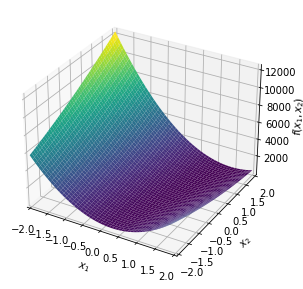

In [ ]:
sp.plotting.plot3d(Q, (x[0],-2,2),(x[1],-2,2))